/tmp/ipykernel_1163023/952108091.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


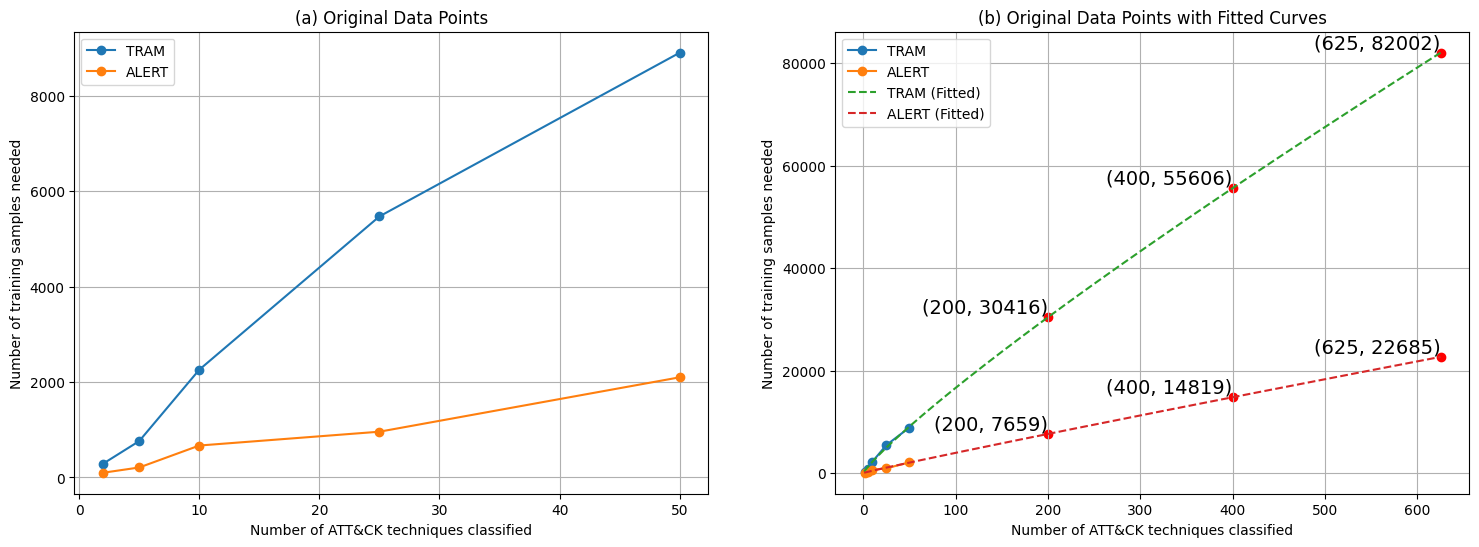

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Data points
x_vals = np.array([2, 5, 10, 25, 50])
y_tram = np.array([291, 764, 2260, 5473, 8904])
y_alert = np.array([100, 210, 670, 960, 2100])

# Fitting curves
def func(x, a, b, c):
    return a*x**b + c

bounds = ([0, 0, 0], [np.inf, np.inf, np.inf])

popt_tram, pcov_tram = curve_fit(func, x_vals, y_tram, bounds=bounds, maxfev=10000)
popt_alert, pcov_alert = curve_fit(func, x_vals, y_alert, bounds=bounds, maxfev=10000)

# Extend x-axis range for fitted curve
x_fit_extended = np.linspace(1, 625, 1000)

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'hspace': 0.5})

# Plotting original points only
axs[0].plot(x_vals, y_tram, 'o-', label='TRAM')
axs[0].plot(x_vals, y_alert, 'o-', label='ALERT')
axs[0].set_xlabel('Number of ATT&CK techniques classified')
axs[0].set_ylabel('Number of training samples needed')
axs[0].set_title('(a) Original Data Points')
axs[0].legend()
axs[0].grid(True)


# extrapolated_points = [100, 200, 500]
# for point in extrapolated_points:
#     y_tram_extrap = func(point, *popt_tram)
#     y_al_scibert_extrap = func(point, *popt_al_scibert)
#     plt.scatter([point], [y_tram_extrap], color='red')
#     plt.scatter([point], [y_al_scibert_extrap], color='red')
#     plt.text(point, y_tram_extrap, f'({point}, {int(y_tram_extrap)})', fontsize=14, ha='right', va='bottom')
#     plt.text(point, y_al_scibert_extrap, f'({point}, {int(y_al_scibert_extrap)})', fontsize=14, ha='right', va='bottom')


# Plotting original points along with fitted curves
axs[1].plot(x_vals, y_tram, 'o-', label='TRAM')
axs[1].plot(x_vals, y_alert, 'o-', label='ALERT')
axs[1].plot(x_fit_extended, func(x_fit_extended, *popt_tram), '--', label='TRAM (Fitted)')
axs[1].plot(x_fit_extended, func(x_fit_extended, *popt_alert), '--', label='ALERT (Fitted)')
# axs[1].scatter([625], [func(625, *popt_tram)], color='red')
# axs[1].scatter([625], [func(625, *popt_al_scibert)], color='red')
# axs[1].text(625, func(625, *popt_tram), f'(625, {int(func(625, *popt_tram))})', fontsize=14, ha='right', va='bottom')
# axs[1].text(625, func(625, *popt_al_scibert), f'(625, {int(func(625, *popt_al_scibert))})', fontsize=14, ha='right', va='bottom')

extrapolated_points = [200, 400, 625]
for point in extrapolated_points:
    y_tram_extrap = func(point, *popt_tram)
    y_al_scibert_extrap = func(point, *popt_alert)
    plt.scatter([point], [y_tram_extrap], color='red')
    plt.scatter([point], [y_al_scibert_extrap], color='red')
    plt.text(point, y_tram_extrap, f'({point}, {int(y_tram_extrap)})', fontsize=14, ha='right', va='bottom')
    plt.text(point, y_al_scibert_extrap, f'({point}, {int(y_al_scibert_extrap)})', fontsize=14, ha='right', va='bottom')

axs[1].set_xlabel('Number of ATT&CK techniques classified')
axs[1].set_ylabel('Number of training samples needed')
axs[1].set_title('(b) Original Data Points with Fitted Curves')
axs[1].legend()
axs[1].grid(True)
  
plt.tight_layout()
plt.savefig('../vis/impact_projection.png', dpi=150, bbox_inches='tight', pad_inches=0.1)
plt.show()
